# training data usign keras

learning objective: 

1. make training data using keras from ebook
2. modify the activation unit using tanh 


In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### Note: 
arti dari `num_words` itu adalah kita hanaya mengambil data yang terbaik 10,000 teratas

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
train_labels[0]

1

#### Note: 
kenapa ini outputnya 1? sepertinya harus baca bener-bener
jadi artinya dallah ketika list nya adalah 0s maka dia adalah negative dan 1s itu adalah positive! 

karena kita hanya mengambil data dari yang paling atas maka kita tidak akan menemukan index lebih dari 10.000. 

In [6]:
# ensure data that not exceed 10.0000
max([max(sequence) for sequence in train_data])

9999

#### Note: 
output tidak lebih dari 10.000, 

#### ini dalam bentuk numpy jadi kamu tidak bisa menggunakan atau memanggil command pandas, obviously

In [7]:
# how to decode one of these reviews back to English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key,) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(1 - 3, '?') for i in train_data[0]])

# Preparing the data

kita tidak bisa menggunakan list dari integer untuk digunakan pada neural network jadi kita harus merbahnya menjadi tensor, nah itu ada dua cara: 
1. pad the list sehingga dia mempunya panjang yang sama, dan gunaakan first layer di network kamu untuk menghandle integer tensor (the embedding layer, which we.ll cover in detail in the book)
2. one-hot encode, jadi vektor 0s dan 1s. sebagai contoh sebagai berikut, misalkan kita mempunyai [3, 5] dimensi, nah itu nanti kita buat menjadi 10.0000 vektor dimensi. kecuali 3 dan 5, 

caranya adalha sebagia berikut

In [8]:
# encoding the integer sequences into a binary matrix 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

## Building your network

In [11]:
# the model definition 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# compilling the model 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# configure the optimizers 
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
# using custom loss and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validation your Approach

In [16]:
# setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# training the model

history  = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 100ms/step - loss: 0.6932 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - lo

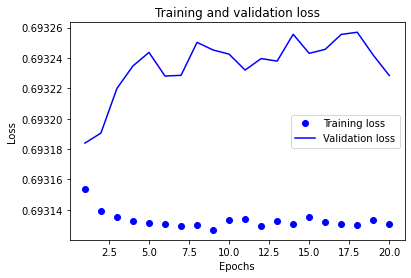

In [20]:
# ploting the training and validation loss 
import matplotlib.pyplot as plt 

loss = history. history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'acc'